In [2]:
import numpy as np
import pandas as pd
from numpy.random import randn

#stats
from scipy import stats

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
dataset = randn(25)

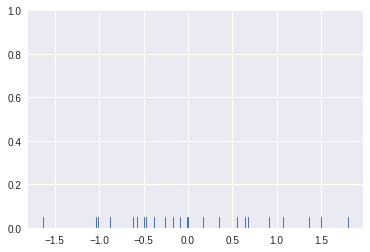

In [4]:
sns.rugplot(dataset)

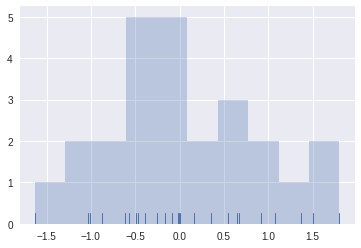

In [5]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

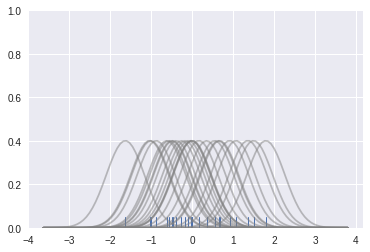

In [6]:
sns.rugplot(dataset)
x_min = dataset.min() -2
x_max = dataset.max() +2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset)) ) ** 0.2

kernel_list = []

for data_point in dataset:
    # create a kernel for each point
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # scale
    kernel = kernel/kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

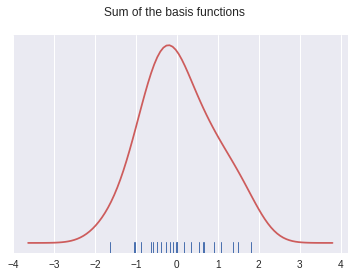

In [7]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

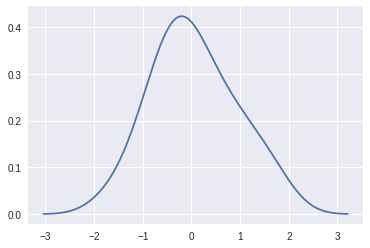

In [8]:
sns.kdeplot(dataset)

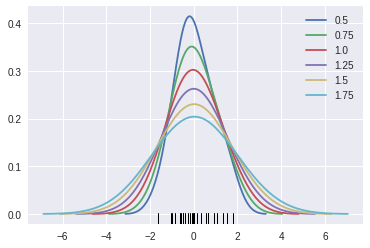

In [9]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

In [10]:
url='https://en.wikipedia.org/wiki/Kernel_(statistics)'

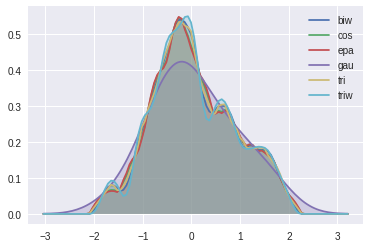

In [12]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True )

In [13]:
url = "https://en.wikipedia.org/wiki/Cumulative_distribution_function"

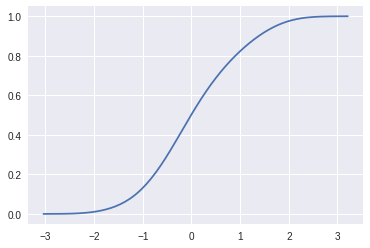

In [15]:
# CDF
sns.kdeplot(dataset, cumulative=True)

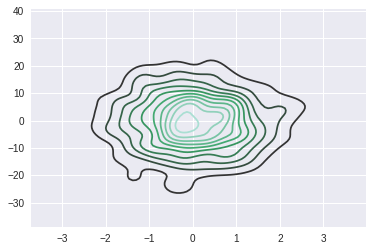

In [17]:
mean = [0,0]
cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)
dframe = pd.DataFrame(dataset2, columns=['X', 'Y'])
sns.kdeplot(dframe)

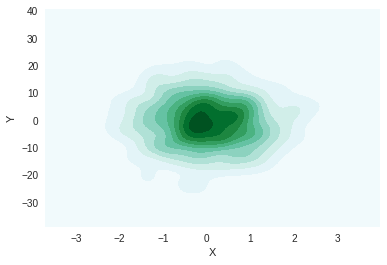

In [18]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

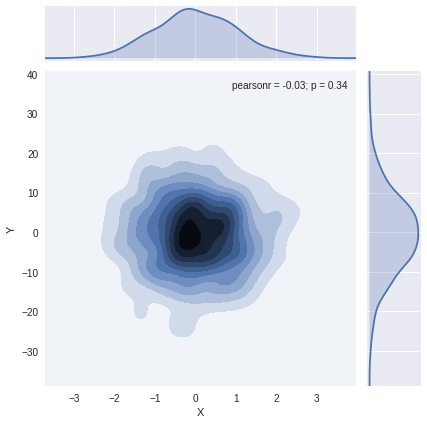

In [21]:
sns.jointplot('X', 'Y', dframe, kind='kde')